In [1]:
from test import test
from train import train
from os.path import isfile, isdir
from os import listdir
from pandas import DataFrame
from Utils.Utils import path_to
import numpy as np
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
plt.rc('font', size=15)

In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,
        normalize=None, title=None, cmap=plt.cm.Blues):

    cm = confusion_matrix(y_true, y_pred,normalize="true") if normalize else confusion_matrix(y_true, y_pred)

    cm_all = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
        
    bottom, top = ax.get_ylim()
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    ax.set_ylim(bottom, top)
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.1%' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
        ax.text(cm.shape[0] + 0.5, i, cm_all.sum(axis=1)[i],
                ha="center", va="center")
    ax.text(cm.shape[0] + 0.5, -1, "N Samples",
            ha="center", va="center")
    fig.tight_layout()
    plt.grid(False)
    return ax

# Different datasets

In [3]:
print("Available setups:")
display(listdir(path_to("config")))

print("\nAvailable image sets (train/test):")
for folder in listdir(path_to("config", "sets")):
    path = path_to("config", "sets", folder)
    if isdir(path):
        print(f"\t{folder}:")
        print(f"\t{listdir(path)}")

Available setups:


['BASELINE_CROPPED_VAL.yaml',
 'debugconfig.yaml',
 'MAR_RESNET18_PADDED_256_lab_borehole-borehole.yaml',
 'MAR_RESNET18_PADDED_256_lab_borehole-lab.yaml',
 'MAR_RESNET18_PADDED_256_lab_borehole-lab_borehole.yaml',
 'MAR_RESNET34_CROPPED_256_lab-borehole.yaml',
 'MAR_RESNET34_CROPPED_256_lab_train.yaml',
 'MAR_RESNET34_CROPPED_256_new.yaml',
 'MAR_RESNET34_CROPPED_256_new_train1.yaml',
 'MAR_RESNET34_CROPPED_256_new_train2.yaml',
 'MAR_RESNET34_CROPPED_256_new_train3.yaml',
 'raw',
 'RN34_CROPPED_256_all.yaml',
 'RN34_CROPPED_256_borehole-lab.yaml',
 'RN34_CROPPED_256_borehole.yaml',
 'sets']


Available image sets (train/test):
	all:
	['all.csv', 'Borehole.csv', 'lab_new-borehole.csv', 'lab_new.csv']
	borehole:
	['test0.csv', 'test1.csv', 'test2.csv', 'train0.csv', 'train1.csv', 'train2.csv', 'train_test_test.csv', 'train_test_train.csv']
	debug:
	['debug.csv', 'test.csv', 'train.csv']
	lab:
	['test0.csv', 'test1.csv', 'test2.csv', 'train0.csv', 'train1.csv', 'train2.csv', 'train_test_test.csv', 'train_test_train.csv']
	new:
	['test0.csv', 'test1.csv', 'test2.csv', 'train0.csv', 'train1.csv', 'train2.csv']


# ResNet18 trained on all

##### Testing all/lab_new-borehole.csv #####
Loading classifier... C:\Users\Axel\Documents\GitHub\Rock-Cuttings-Characterization\outputs\MAR_RESNET18_PADDED_256_lab_borehole_train\model_0.pt
Loading done. Predicting...
Prediction 525/525    |██████████| 100.0%

Calculating accuracy score...
Predictions done. Calculating loss...
Loss calculated.


,Accuracy,Loss
0,0.910076,0.284429


TypeError: unsupported format string passed to list.__format__

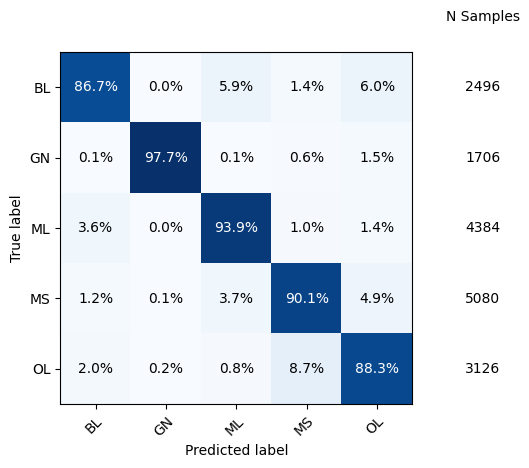

In [4]:
acc_new_lbbl, loss_new_lbbl, predictions_lbbl, labels_lbbl = test('MAR_RESNET18_PADDED_256_lab_borehole-lab_borehole.yaml')
new_lbbl = DataFrame(
    data = zip(acc_new_lbbl, loss_new_lbbl),
    columns = ('Accuracy', 'Loss')
)
display(new_lbbl)

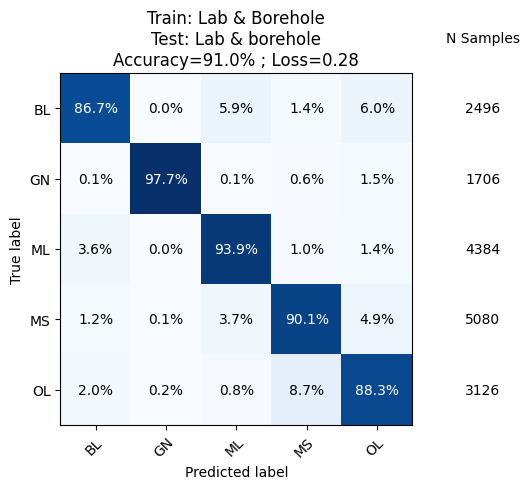

In [15]:
for acc, loss, label, prediction in zip(acc_new_lbbl, loss_new_lbbl, labels_lbbl, predictions_lbbl):
    plot_confusion_matrix(label, prediction, ('BL', 'GN', 'ML', 'MS', 'OL'), normalize=True)
    plt.title(
        f"Train: Lab & Borehole\n"
        f"Test: Lab & borehole\n"
        f"Accuracy={acc:.1%} ; Loss={loss:.2f}"
    )
    plt.show()

##### Testing all/lab_new.csv #####
Loading classifier... C:\Users\Axel\Documents\GitHub\Rock-Cuttings-Characterization\outputs\MAR_RESNET18_PADDED_256_lab_borehole_train\model_0.pt
Loading done. Predicting...
Prediction 163/163    |██████████| 100.0%

Calculating accuracy score...
Predictions done. Calculating loss...
Loss calculated.


,Accuracy,Loss
0,0.988077,0.035093


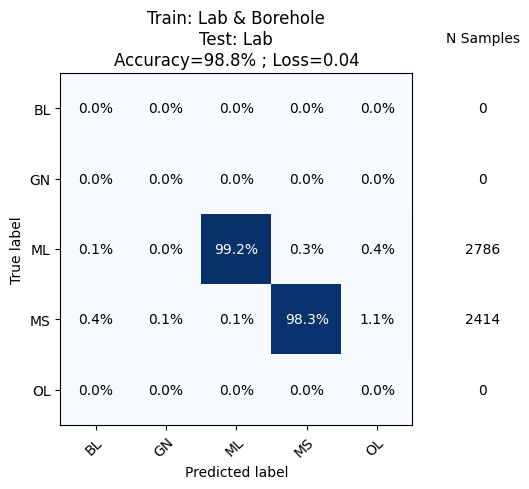

In [16]:
acc_new_lb, loss_new_lb, predictions_lb, labels_lb = test('MAR_RESNET18_PADDED_256_lab_borehole-lab.yaml')
new_lb = DataFrame(
    data = zip(acc_new_lb, loss_new_lb),
    columns = ('Accuracy', 'Loss')
)
display(new_lb)
for acc, loss, label, prediction in zip(acc_new_lb, loss_new_lb, labels_lb, predictions_lb):
    plot_confusion_matrix(label, prediction, ('BL', 'GN', 'ML', 'MS', 'OL'), normalize=True)
    plt.title(
        f"Train: Lab & Borehole\n"
        f"Test: Lab\n"
        f"Accuracy={acc:.1%} ; Loss={loss:.2f}"
    )
    plt.savefig('RN18_PD256-lab_borehole-lab.pdf')
    plt.show()

##### Testing all/Borehole.csv #####
Loading classifier... C:\Users\Axel\Documents\GitHub\Rock-Cuttings-Characterization\outputs\MAR_RESNET18_PADDED_256_lab_borehole_train\model_0.pt
Loading done. Predicting...
Prediction 363/363    |██████████| 100.0%

Calculating accuracy score...
Predictions done. Calculating loss...
Loss calculated.


,Accuracy,Loss
0,0.875086,0.397077


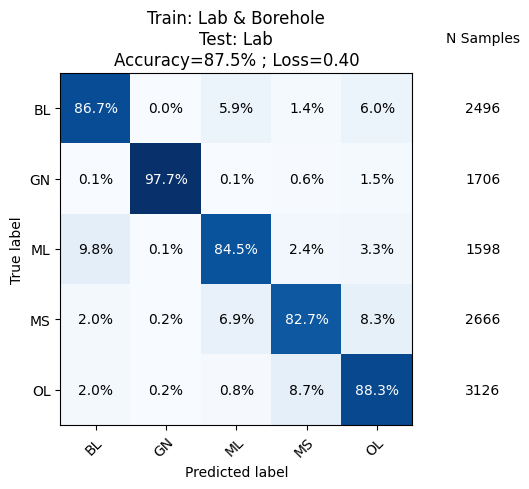

In [17]:
acc_new_bl, loss_new_bl, predictions_bl, labels_bl = test('MAR_RESNET18_PADDED_256_lab_borehole-borehole.yaml')
new_bl = DataFrame(
    data = zip(acc_new_bl, loss_new_bl),
    columns = ('Accuracy', 'Loss')
)
display(new_bl)
for acc, loss, label, prediction in zip(acc_new_bl, loss_new_bl, labels_bl, predictions_bl):
    plot_confusion_matrix(label, prediction, ('BL', 'GN', 'ML', 'MS', 'OL'), normalize=True)
    plt.title(
        f"Train: Lab & Borehole\n"
        f"Test: Lab\n"
        f"Accuracy={acc:.1%} ; Loss={loss:.2f}"
    )
    plt.savefig('RN18_PD256-lab_borehole-borehole.pdf')
    plt.show()

In [5]:
acc_new_18bllb, loss_new_18bllb, predictions_18bllb, labels_18bllb = test('MAR_RESNET18_PADDED_256_borehole-lab.yaml')
new_18bllb = DataFrame(
    data = zip(acc_new_18bllb, loss_new_18bllb),
    columns = ('Accuracy', 'Loss')
)
display(new_18bllb)
for acc, loss, label, prediction in zip(acc_new_18bllb, loss_new_18bllb, labels_18bllb, predictions_18bllb):
    plot_confusion_matrix(label, prediction, ('BL', 'GN', 'ML', 'MS', 'OL'), normalize=True)
    plt.title(
        f"Trained on Borehole, tested on Lab\n"
        f"Accuracy={acc:.1%} ; Loss={loss:.2f}"
    )
    plt.savefig(path_to('report', 'RN18_PD256-borehole-lab.pdf'))
    plt.show()

##### Testing all/lab_new.csv #####
Loading classifier... C:\Users\Axel\Documents\GitHub\Rock-Cuttings-Characterization\outputs\MAR_RESNET18_PADDED_256_borehole_train\model_0.pt
Loading done. Predicting...


In [ ]:
acc_new_18lbbl, loss_new_18lbbl, predictions_18lbbl, labels_18lbbl = test('MAR_RESNET18_PADDED_256_lab-borehole.yaml')
new_18lbbl = DataFrame(
    data = zip(acc_new_18lbbl, loss_new_18lbbl),
    columns = ('Accuracy', 'Loss')
)
display(new_18lbbl)
for acc, loss, label, prediction in zip(acc_new_18lbbl, loss_new_18lbbl, labels_18lbbl, predictions_18lbbl):
    plot_confusion_matrix(label, prediction, ('BL', 'GN', 'ML', 'MS', 'OL'), normalize=True)
    plt.title(
        f"Trained Lab, tested Borehole\n"
        f"Accuracy={acc:.1%} ; Loss={loss:.2f}"
    )
    plt.savefig(path_to('report', 'RN18_PD256-lab-borehole.pdf'))
    plt.show()

# Resnet34

##### Testing all/lab_new.csv #####
Loading classifier... C:\Users\Axel\Documents\GitHub\Rock-Cuttings-Characterization\outputs\MAR_RESNET34_CROPPED_256_lab_train\model_0.pt
Loading done. Predicting...
Prediction 163/163    |██████████| 100.0%

Calculating accuracy score...
Predictions done. Calculating loss...
Loss calculated.


,Accuracy,Loss
0,0.673654,3.107093


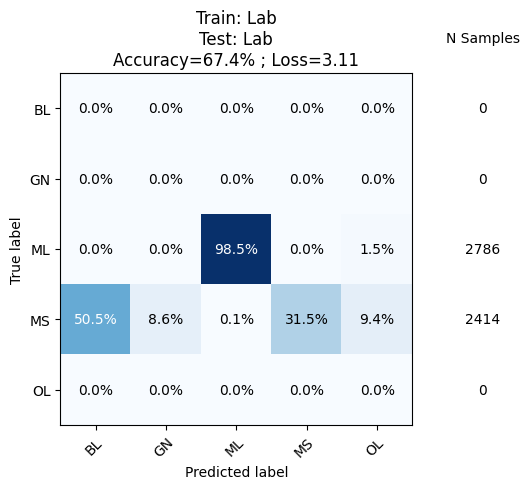

In [3]:
acc_new_34lblb, loss_34lblb, predictions_34lblb, labels_34lblb = test("MAR_RESNET34_CROPPED_256_lab_train.yaml")
new_34lblb = DataFrame(
    data = zip(acc_new_34lblb, loss_34lblb),
    columns = ('Accuracy', 'Loss')
)
display(new_34lblb)
for acc, loss, label, prediction in zip(acc_new_34lblb, loss_34lblb, labels_34lblb, predictions_34lblb):
    plot_confusion_matrix(label, prediction, ('BL', 'GN', 'ML', 'MS', 'OL'), normalize=True)
    plt.title(
        f"Train: Lab\n"
        f"Test: Lab\n"
        f"Accuracy={acc:.1%} ; Loss={loss:.2f}"
    )
    plt.savefig(path_to('report', 'RN34_CP256-lab-lab.pdf'))
    plt.show()

In [4]:
acc_new_34bllb, loss_34bllb, predictions_34bllb, labels_34bllb = test("RN34_CROPPED_256_borehole-lab.yaml")
new_34bllb = DataFrame(
    data = zip(acc_new_34bllb, loss_34bllb),
    columns = ('Accuracy', 'Loss')
)
display(new_34bllb)
for acc, loss, label, prediction in zip(acc_new_34bllb, loss_34bllb, labels_34bllb, predictions_34bllb):
    plot_confusion_matrix(label, prediction, ('BL', 'GN', 'ML', 'MS', 'OL'), normalize=True)
    plt.title(
        f"Train: Borehole\n"
        f"Test: Lab\n"
        f"Accuracy={acc:.1%} ; Loss={loss:.2f}"
    )
    plt.savefig(path_to('report', 'RN34_CP256-borehole-lab.pdf'))
    plt.show()

##### Testing all/lab_new.csv #####
Loading classifier... C:\Users\Axel\Documents\GitHub\Rock-Cuttings-Characterization\outputs\MAR_RESNET34_CROPPED_256_borehole_train\model_0.pt
Loading done. Predicting...


KeyboardInterrupt: 

In [ ]:
acc_34lbbl, loss_34lbbl, predictions_34lbbl, labels_34lbbl = test('MAR_RESNET34_CROPPED_256_lab-borehole.yaml')
borehole_34lbbl = DataFrame(
    data = zip(acc_34lbbl, loss_34lbbl),
    columns = ('Accuracy', 'Loss')
)
display(borehole_34lbbl)
for acc, loss, label, prediction in zip(acc_34lbbl, loss_34lbbl, labels_34lbbl, predictions_34lbbl):
    plot_confusion_matrix(label, prediction, ('BL', 'GN', 'ML', 'MS', 'OL'), normalize=True)
    plt.title(
        f"Train: Lab\n"
        f"Test: Borehole\n"
        f"Accuracy={acc:.1%} ; Loss={loss:.2f}"
    )
    plt.savefig(path_to('report', 'RN34_CP256-lab-borehole.pdf'))
    plt.show()

In [ ]:
acc_34blbl, loss_34blbl, predictions_34blbl, labels_34blbl = test('MAR_RESNET34_CROPPED_256_borehole.yaml')
borehole_34blbl = DataFrame(
    data = zip(acc_34blbl, loss_34blbl),
    columns = ('Accuracy', 'Loss')
)
display(borehole_34blbl)
for acc, loss, label, prediction in zip(acc_34blbl, loss_34blbl, labels_34blbl, predictions_34blbl):
    plot_confusion_matrix(label, prediction, ('BL', 'GN', 'ML', 'MS', 'OL'), normalize=True)
    plt.title(
        f"Train: Borehole\n"
        f"Test: Borehole\n"
        f"Accuracy={acc:.1%} ; Loss={loss:.2f}"
    )
    plt.savefig(path_to('report', 'RN34_CP256-borehole-borehole.pdf'))
    plt.show()

In [ ]:
plt.rcParams['font.size']